In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plttick
import seaborn as sns

covid_df = pd.read_csv('data/covid_df.csv', sep=',', decimal='.')

In [2]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population'])

croped_covid_df = croped_covid_df.merge(populations, on='country')
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df['date'] = pd.to_datetime(croped_covid_df['date'])
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
croped_covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred,quarter
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,1
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016,1
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004,1
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000,1


Text(0.5, 1.0, 'Гистограмма ежедневной заболеваемости на 100 человек')

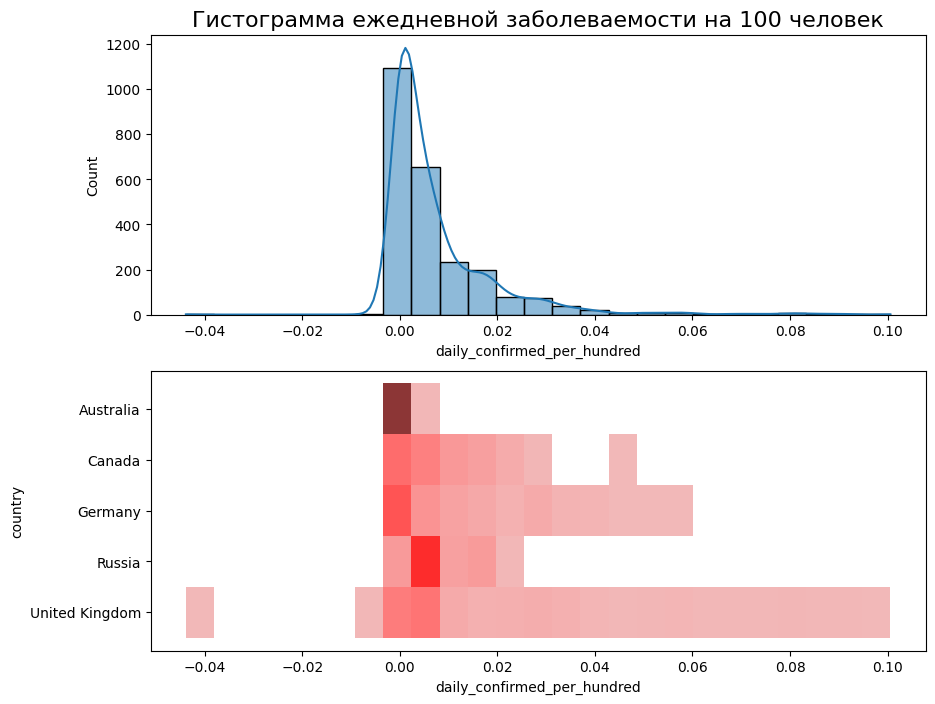

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)

sns.histplot(
    croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    color='red',
    bins=25,
    ax=axes[1]
)

axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

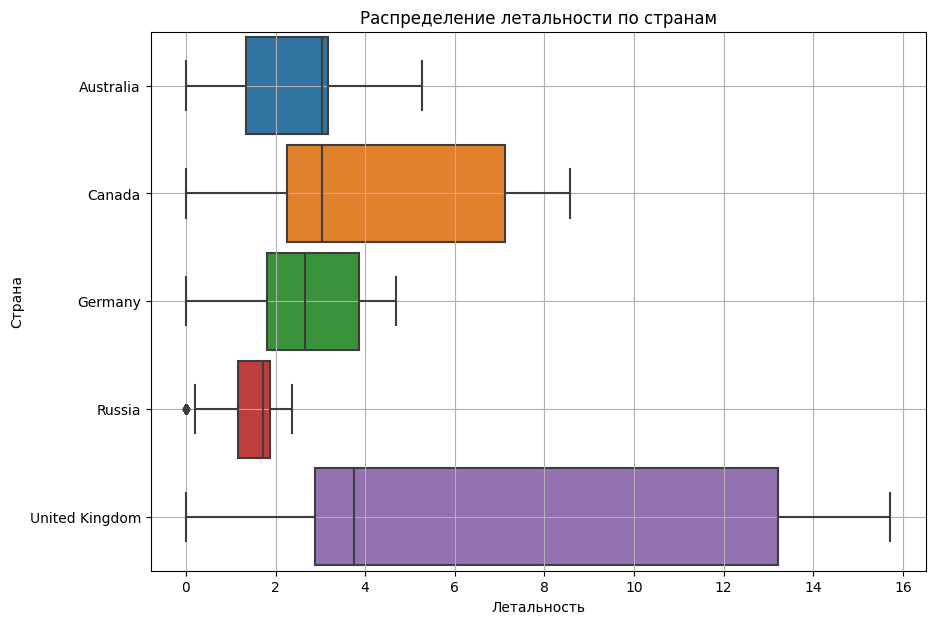

In [4]:
fig = plt.figure(figsize=(10, 7))

boxplot = sns.boxplot(
    croped_covid_df,
    y='country',
    x='death_rate',
    width=0.9,
    orient='h'
)

boxplot.set_title('Распределение летальности по странам', fontsize=12)
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

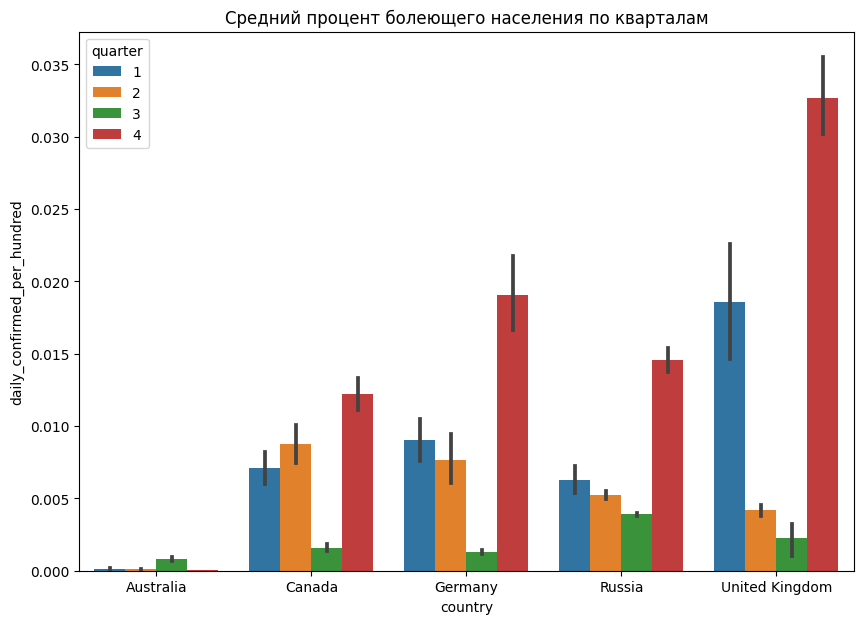

In [5]:
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)

barplot.set_title('Средний процент болеющего населения по кварталам', fontsize=12)

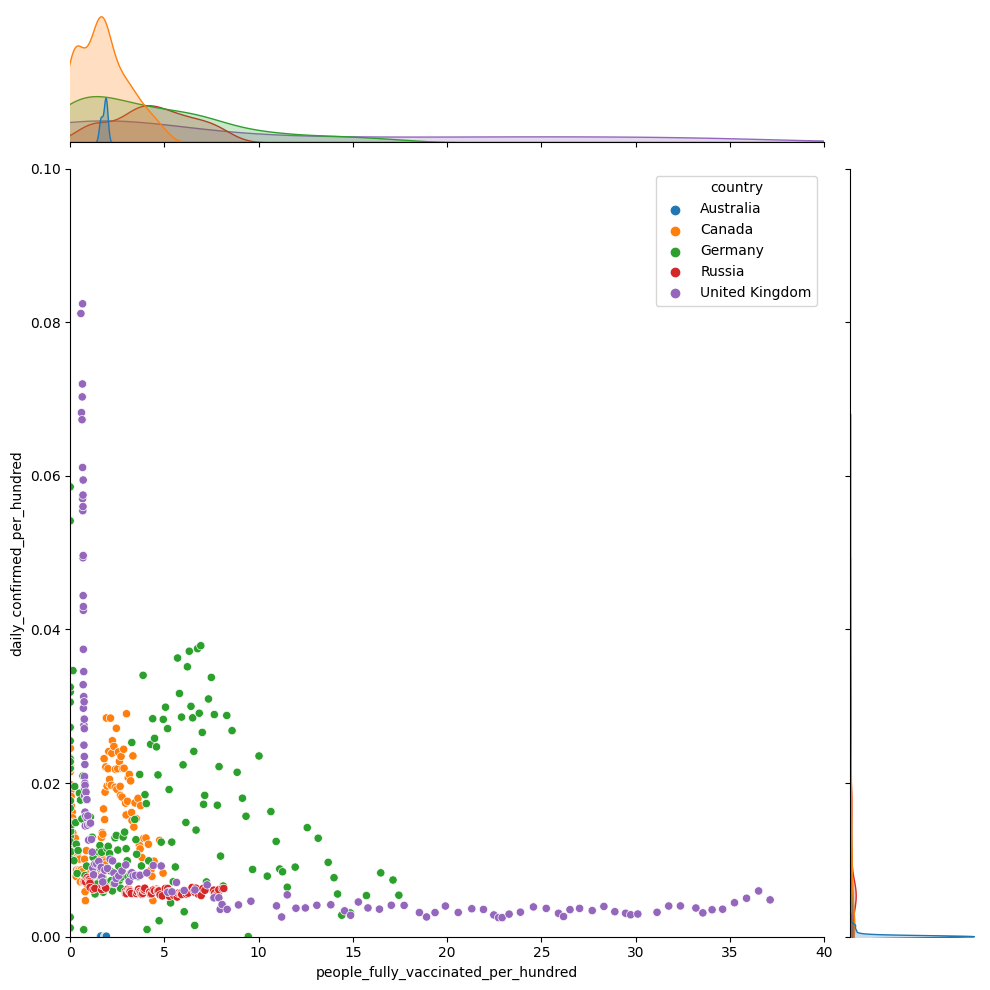

In [6]:
jointplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    xlim=(0, 40),
    ylim=(0, 0.1),
    hue='country',
    height=10
)


Text(0.5, 1.0, 'Тепловая карта вакцинации')

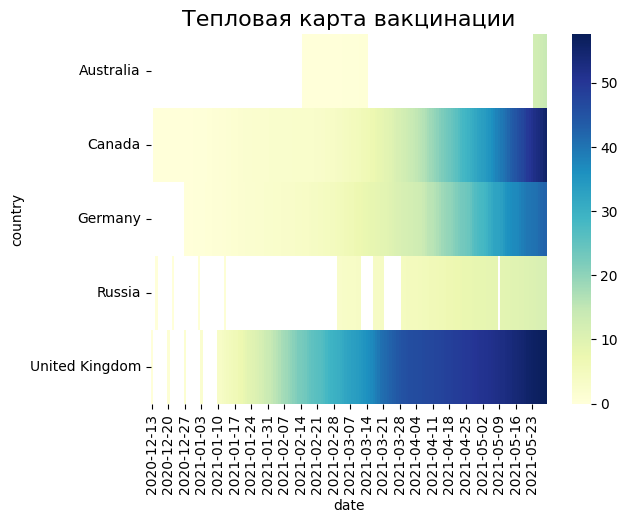

In [7]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)

pivot.columns = pivot.columns.astype('string')
pivot

heatmap = sns.heatmap(pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)

<AxesSubplot: xlabel='country', ylabel='people_vaccinated_per_hundred'>

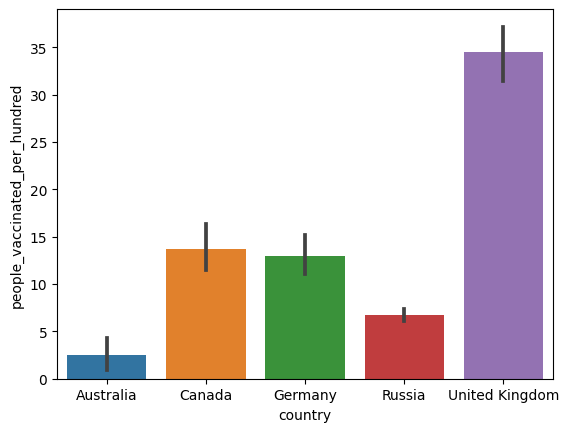

In [8]:
sns.barplot(
    data=croped_covid_df,
    x='country',
    y='people_vaccinated_per_hundred',
    
)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


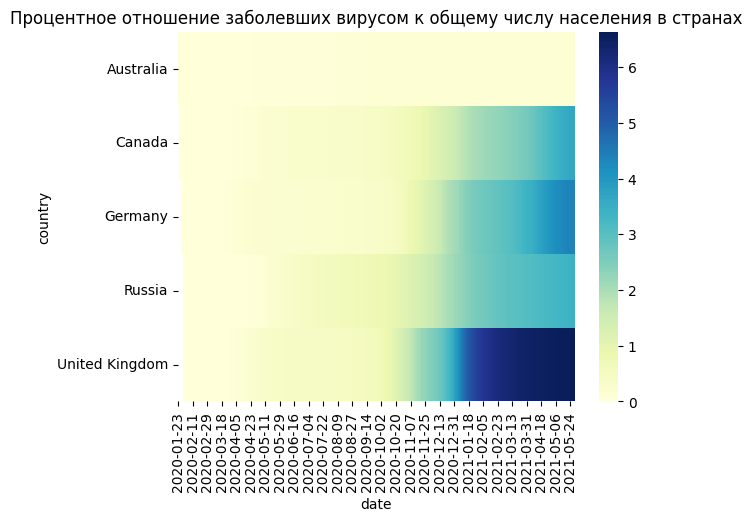

In [11]:
loc= plttick.MultipleLocator(base=5.0)

croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')

heatmap = sns.heatmap(pivot, cmap='YlGnBu')


heatmap.set_title('Процентное отношение заболевших вирусом к общему числу населения в странах')
display(pivot)

country
Australia         78.871083
Canada            84.259404
Germany           87.905438
Russia            79.358398
United Kingdom     0.360075
Name: recover_rate, dtype: float64

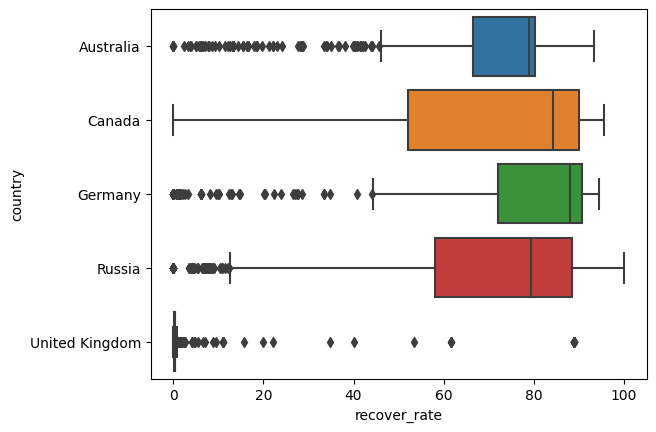

In [10]:
sns.boxplot(
    data=croped_covid_df,
    x='recover_rate',
    y='country',
    width=0.8,
    orient='h'
)

croped_covid_df.groupby('country')['recover_rate'].median()